Epoch 1/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 279s 587ms/step - accuracy: 0.3113 - loss: 2.4015 - val_accuracy: 0.8544 - val_loss: 0.5317
Epoch 2/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 285s 603ms/step - accuracy: 0.7003 - loss: 0.8684 - val_accuracy: 0.9184 - val_loss: 0.3239
Epoch 3/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 264s 567ms/step - accuracy: 0.7842 - loss: 0.6464 - val_accuracy: 0.9382 - val_loss: 0.2502
Epoch 4/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 258s 555ms/step - accuracy: 0.8146 - loss: 0.5325 - val_accuracy: 0.9428 - val_loss: 0.2095
Epoch 5/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 257s 552ms/step - accuracy: 0.8322 - loss: 0.4739 - val_accuracy: 0.9484 - val_loss: 0.1981
Epoch 6/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 257s 552ms/step - accuracy: 0.8484 - loss: 0.4372 - val_accuracy: 0.9535 - val_loss: 0.1706
Epoch 7/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 258s 555ms/step - accuracy: 0.8582 - loss: 0.4086 - val_accuracy: 0.9632 - val_loss: 0.1505
Epoch 8/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 256s 551ms/step - accuracy: 0.8619 -

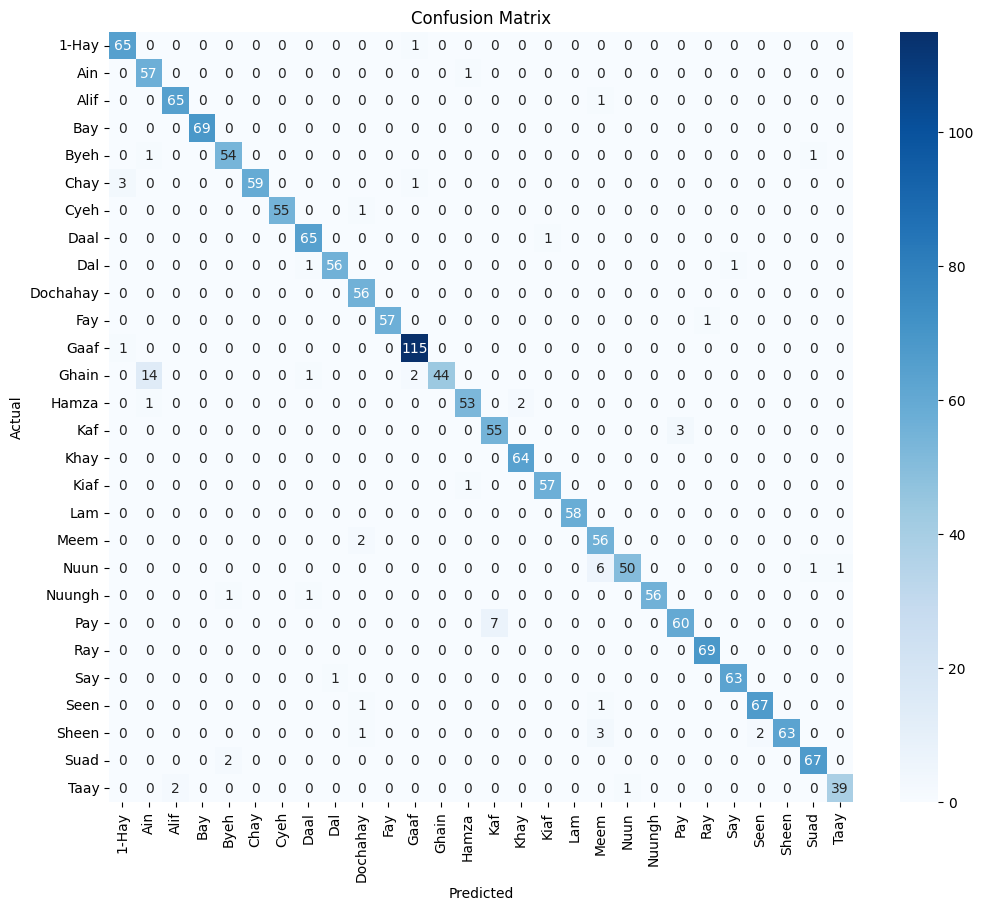

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

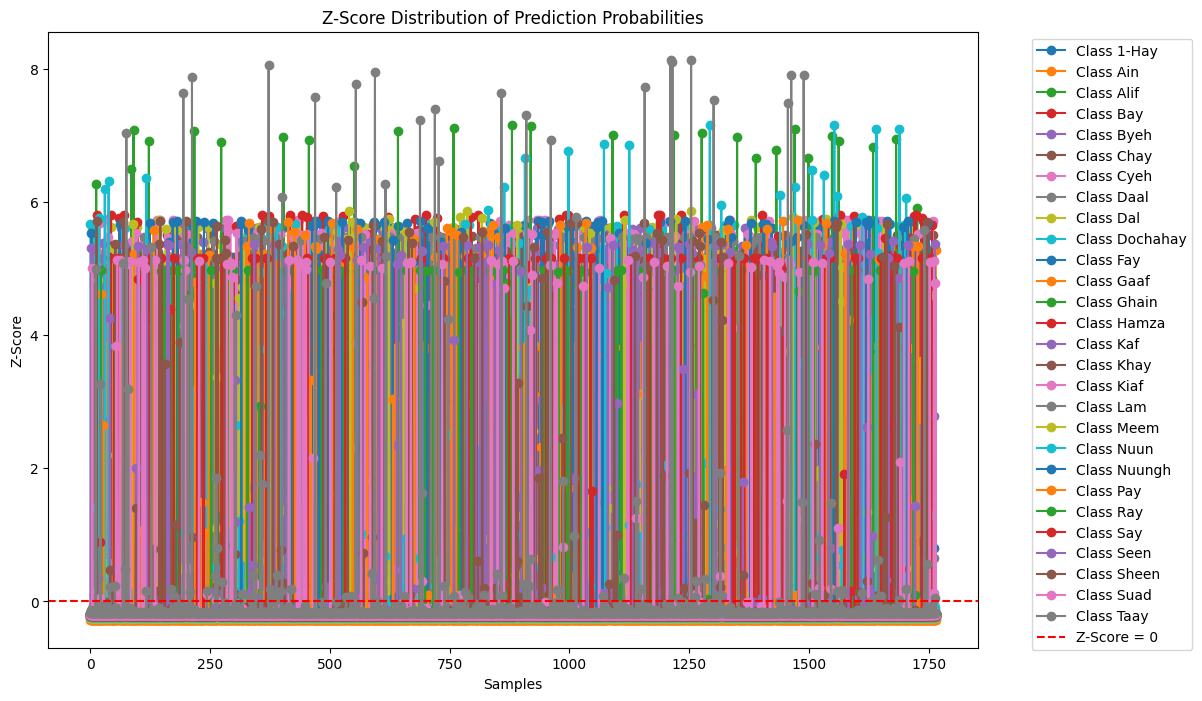

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Define constants
DATASET_PATH = r"C:\Users\hp\OneDrive\Desktop\FYP 2021\Pakistan Sign Language Urdu Alphabets"
IMG_SIZE = 224  # Image size for MobileNetV2
BATCH_SIZE = 32

# Get class names
class_names = [directory for directory in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, directory))]

# Split dataset paths and labels into training, validation, and test sets
def get_image_paths_and_labels(dataset_path, class_names):
    image_paths = []
    labels = []
    for idx, class_name in enumerate(class_names):
        class_path = os.path.join(dataset_path, class_name)
        for file_name in os.listdir(class_path):
            image_paths.append(os.path.join(class_path, file_name))
            labels.append(idx)
    return np.array(image_paths), np.array(labels)

# Load image paths and labels
image_paths, labels = get_image_paths_and_labels(DATASET_PATH, class_names)

from sklearn.model_selection import train_test_split

# Split dataset into training, validation, and test sets
train_paths, temp_paths, train_labels, temp_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42, stratify=labels
)

val_paths, test_paths, val_labels, test_labels = train_test_split(
    temp_paths, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels
)


# Helper function to preprocess data
def preprocess_data(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0  # Normalize
    return image, label

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
train_dataset = train_dataset.map(preprocess_data).batch(BATCH_SIZE).shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
val_dataset = val_dataset.map(preprocess_data).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))
test_dataset = test_dataset.map(preprocess_data).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze the base model

# Add custom layers for the classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(class_names), activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',  # Use sparse if labels are integers
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Make predictions on the test dataset
predictions = np.argmax(model.predict(test_dataset), axis=-1)  # Get the class with the highest probability
true_labels = np.concatenate([y for x, y in test_dataset], axis=0)

# Classification report
print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=class_names))

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Z-Score Graph
probs = np.concatenate([model.predict(x) for x, y in test_dataset])
z_scores = stats.zscore(probs, axis=0)  # Calculate z-scores across the classes
plt.figure(figsize=(12, 8))
for i, class_name in enumerate(class_names):
    plt.plot(z_scores[:, i], label=f'Class {class_name}', marker='o', linestyle='-')
plt.axhline(y=0, color='r', linestyle='--', label='Z-Score = 0')
plt.title('Z-Score Distribution of Prediction Probabilities')
plt.xlabel('Samples')
plt.ylabel('Z-Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [2]:
model.save("sign_language_10_epoch_mobilelNETv2.h5")

In [5]:
from tensorflow.keras.models import load_model
model_path = r"C:\Users\hp\OneDrive\Desktop\FYP 2021\codes\sign_language_10_epoch_mobilelNETv2.h5" 
model = load_model(model_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Class: Dochahay


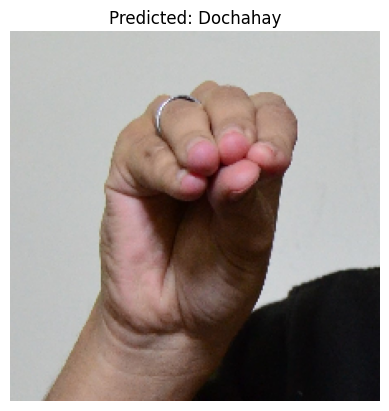

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Class names corresponding to your new model
class_names =[
    '1-Hay', 'Ain', 'Alif', 'Bay', 'Byeh', 'Chay', 'Cyeh', 'Daal', 'Dal', 'Dochahay', 
    'Fay', 'Gaaf', 'Ghain', 'Hamza', 'Kaf', 'Khay', 'Kiaf', 'Lam', 'Meem', 
    'Nuun', 'Nuungh', 'Pay', 'Ray', 'Say', 'Seen', 'Sheen', 'Suad', 'Taay'
]

# Path to the test image
img_path = r"C:\Users\hp\OneDrive\Desktop\FYP 2021\Pakistan Sign Language Urdu Alphabets\Dochahay\s0261-37dochahay.jpg"
# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to model input size
img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class probabilities
pred = model.predict(img_array)

# Decode the prediction result
predicted_class_index = np.argmax(pred, axis=-1)  # Get the index of the highest probability
predicted_class = class_names[predicted_class_index[0]]  # Map index to class name

# Print the predicted class
print(f"Predicted Class: {predicted_class}")

# Display the image
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Class: Lam


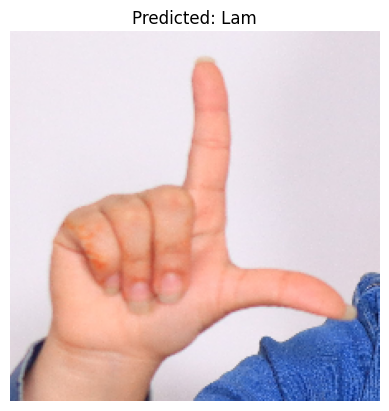

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Class names corresponding to your new model
class_names =[
    '1-Hay', 'Ain', 'Alif', 'Bay', 'Byeh', 'Chay', 'Cyeh', 'Daal', 'Dal', 'Dochahay', 
    'Fay', 'Gaaf', 'Ghain', 'Hamza', 'Kaf', 'Khay', 'Kiaf', 'Lam', 'Meem', 
    'Nuun', 'Nuungh', 'Pay', 'Ray', 'Say', 'Seen', 'Sheen', 'Suad', 'Taay'
]

# Path to the test image
img_path = r"C:\Users\hp\OneDrive\Desktop\FYP 2021\Pakistan Sign Language Urdu Alphabets\Lam\s0251-31lam.JPG"
# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to model input size
img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class probabilities
pred = model.predict(img_array)

# Decode the prediction result
predicted_class_index = np.argmax(pred, axis=-1)  # Get the index of the highest probability
predicted_class = class_names[predicted_class_index[0]]  # Map index to class name

# Print the predicted class
print(f"Predicted Class: {predicted_class}")

# Display the image
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Class: Lam


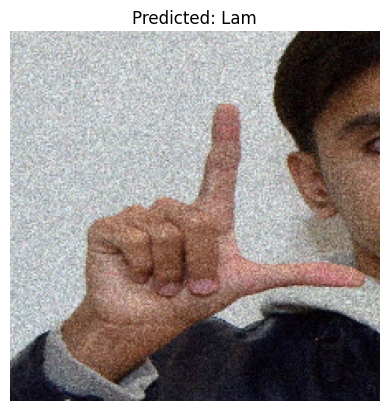

In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Class names corresponding to your new model
class_names =[
    '1-Hay', 'Ain', 'Alif', 'Bay', 'Byeh', 'Chay', 'Cyeh', 'Daal', 'Dal', 'Dochahay', 
    'Fay', 'Gaaf', 'Ghain', 'Hamza', 'Kaf', 'Khay', 'Kiaf', 'Lam', 'Meem', 
    'Nuun', 'Nuungh', 'Pay', 'Ray', 'Say', 'Seen', 'Sheen', 'Suad', 'Taay'
]

# Path to the test image
img_path =  r"C:\Users\hp\OneDrive\Desktop\FYP 2021\Pakistan Sign Language Urdu Alphabets\Lam\s0264-31lam-Generated-7410.jpg"
# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to model input size
img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class probabilities
pred = model.predict(img_array)

# Decode the prediction result
predicted_class_index = np.argmax(pred, axis=-1)  # Get the index of the highest probability
predicted_class = class_names[predicted_class_index[0]]  # Map index to class name

# Print the predicted class
print(f"Predicted Class: {predicted_class}")

# Display the image
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Class: Lam


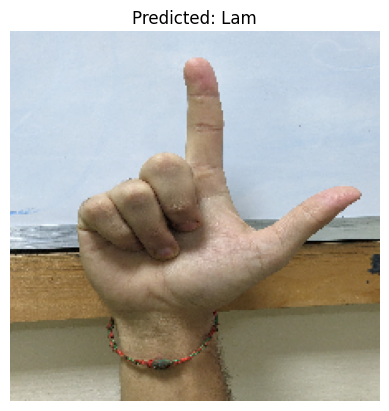

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Class names corresponding to your new model
class_names =[
    '1-Hay', 'Ain', 'Alif', 'Bay', 'Byeh', 'Chay', 'Cyeh', 'Daal', 'Dal', 'Dochahay', 
    'Fay', 'Gaaf', 'Ghain', 'Hamza', 'Kaf', 'Khay', 'Kiaf', 'Lam', 'Meem', 
    'Nuun', 'Nuungh', 'Pay', 'Ray', 'Say', 'Seen', 'Sheen', 'Suad', 'Taay'
]

# Path to the test image
img_path =  r"C:\Users\hp\OneDrive\Desktop\FYP 2021\test_image.jpg"
# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to model input size
img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class probabilities
pred = model.predict(img_array)

# Decode the prediction result
predicted_class_index = np.argmax(pred, axis=-1)  # Get the index of the highest probability
predicted_class = class_names[predicted_class_index[0]]  # Map index to class name

# Print the predicted class
print(f"Predicted Class: {predicted_class}")

# Display the image
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Class: Ain


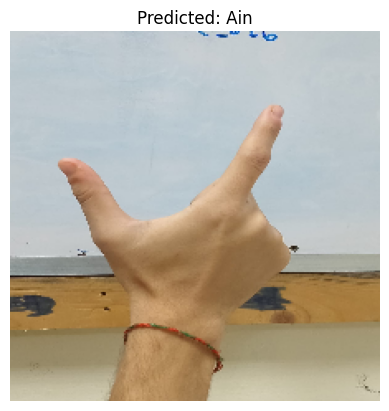

In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Class names corresponding to your new model
class_names =[
    '1-Hay', 'Ain', 'Alif', 'Bay', 'Byeh', 'Chay', 'Cyeh', 'Daal', 'Dal', 'Dochahay', 
    'Fay', 'Gaaf', 'Ghain', 'Hamza', 'Kaf', 'Khay', 'Kiaf', 'Lam', 'Meem', 
    'Nuun', 'Nuungh', 'Pay', 'Ray', 'Say', 'Seen', 'Sheen', 'Suad', 'Taay'
]

# Path to the test image
img_path =  r"C:\Users\hp\OneDrive\Desktop\FYP 2021\test_image_1.jpg"
# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to model input size
img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class probabilities
pred = model.predict(img_array)

# Decode the prediction result
predicted_class_index = np.argmax(pred, axis=-1)  # Get the index of the highest probability
predicted_class = class_names[predicted_class_index[0]]  # Map index to class name

# Print the predicted class
print(f"Predicted Class: {predicted_class}")

# Display the image
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Seen


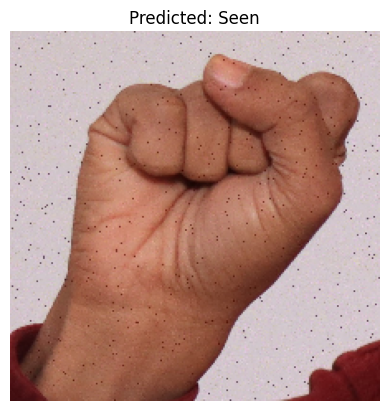

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
model = load_model(r"C:\Users\hp\OneDrive\Desktop\FYP 2021\codes\sign_language_10_epoch_mobilelNETv2.h5")
# Class names corresponding to your new model
class_names =[
    '1-Hay', 'Ain', 'Alif', 'Bay', 'Byeh', 'Chay', 'Cyeh', 'Daal', 'Dal', 'Dochahay', 
    'Fay', 'Gaaf', 'Ghain', 'Hamza', 'Kaf', 'Khay', 'Kiaf', 'Lam', 'Meem', 
    'Nuun', 'Nuungh', 'Pay', 'Ray', 'Say', 'Seen', 'Sheen', 'Suad', 'Taay'
]

# Path to the test image
img_path = r"C:\Users\hp\OneDrive\Desktop\FYP 2021\Pakistan Sign Language Urdu Alphabets\Seen\s0252-19seen-Generated-797.jpg"
# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to model input size
img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class probabilities
pred = model.predict(img_array)

# Decode the prediction result
predicted_class_index = np.argmax(pred, axis=-1)  # Get the index of the highest probability
predicted_class = class_names[predicted_class_index[0]]  # Map index to class name

# Print the predicted class
print(f"Predicted Class: {predicted_class}")

# Display the image
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Sheen


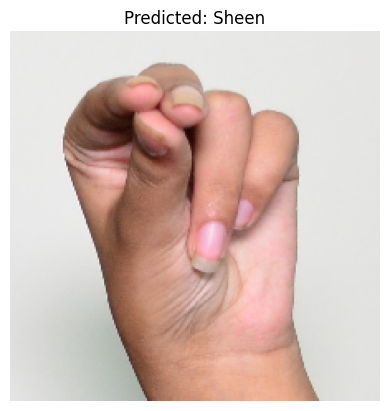

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
model = load_model(r"C:\Users\hp\OneDrive\Desktop\FYP 2021\codes\sign_language_10_epoch_mobilelNETv2.h5")
# Class names corresponding to your new model
class_names =[
    '1-Hay', 'Ain', 'Alif', 'Bay', 'Byeh', 'Chay', 'Cyeh', 'Daal', 'Dal', 'Dochahay', 
    'Fay', 'Gaaf', 'Ghain', 'Hamza', 'Kaf', 'Khay', 'Kiaf', 'Lam', 'Meem', 
    'Nuun', 'Nuungh', 'Pay', 'Ray', 'Say', 'Seen', 'Sheen', 'Suad', 'Taay'
]

# Path to the test image
img_path = r"C:\Users\hp\OneDrive\Desktop\FYP 2021\Pakistan Sign Language Urdu Alphabets\Sheen\s0258-20sheen-Generated-2855.jpg"
# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to model input size
img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class probabilities
pred = model.predict(img_array)

# Decode the prediction result
predicted_class_index = np.argmax(pred, axis=-1)  # Get the index of the highest probability
predicted_class = class_names[predicted_class_index[0]]  # Map index to class name

# Print the predicted class
print(f"Predicted Class: {predicted_class}")

# Display the image
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Hamza


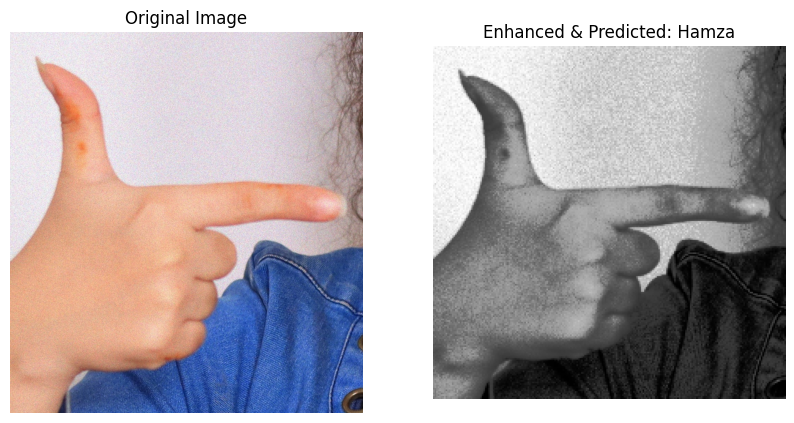

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model(r"C:\Users\hp\OneDrive\Desktop\FYP 2021\codes\sign_language_10_epoch_mobilelNETv2.h5")

# Class names corresponding to your new model
class_names = [
    '1-Hay', 'Ain', 'Alif', 'Bay', 'Byeh', 'Chay', 'Cyeh', 'Daal', 'Dal', 'Dochahay', 
    'Fay', 'Gaaf', 'Ghain', 'Hamza', 'Kaf', 'Khay', 'Kiaf', 'Lam', 'Meem', 
    'Nuun', 'Nuungh', 'Pay', 'Ray', 'Say', 'Seen', 'Sheen', 'Suad', 'Taay'
]

# Path to the test image
img_path = r"C:\Users\hp\OneDrive\Desktop\FYP 2021\Pakistan Sign Language Urdu Alphabets\Hamza\s0251-38hamza-Generated-400.jpg"

# Load the image using OpenCV
img = cv2.imread(img_path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply histogram equalization to enhance contrast
equalized = cv2.equalizeHist(blurred)

# Convert back to RGB (since MobileNetV2 expects 3 channels)
enhanced_img = cv2.cvtColor(equalized, cv2.COLOR_GRAY2RGB)

# Resize to model input size
enhanced_img = cv2.resize(enhanced_img, (224, 224))

# Normalize pixel values to [0, 1]
enhanced_img = enhanced_img / 255.0

# Add batch dimension
img_array = np.expand_dims(enhanced_img, axis=0)

# Predict the class probabilities
pred = model.predict(img_array)

# Decode the prediction result
predicted_class_index = np.argmax(pred, axis=-1)  # Get the index of the highest probability
predicted_class = class_names[predicted_class_index[0]]  # Map index to class name

# Print the predicted class
print(f"Predicted Class: {predicted_class}")

# Display the original and enhanced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_img)
plt.title(f"Enhanced & Predicted: {predicted_class}")
plt.axis('off')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Dochahay


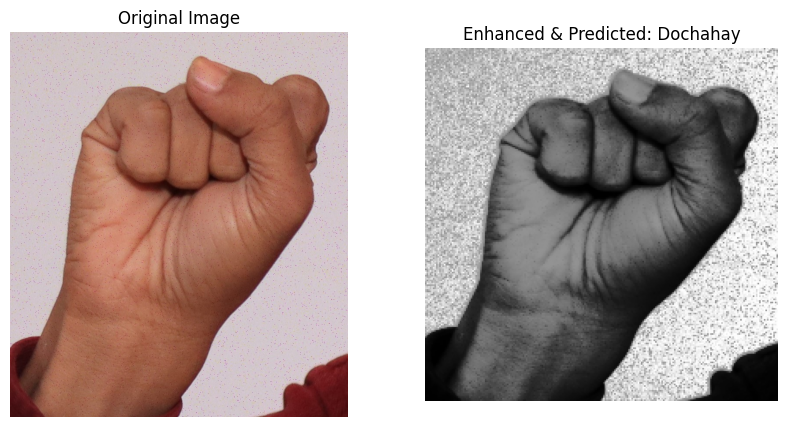

In [20]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model(r"C:\Users\hp\OneDrive\Desktop\FYP 2021\codes\sign_language_10_epoch_mobilelNETv2.h5")

# Class names corresponding to your new model
class_names = [
    '1-Hay', 'Ain', 'Alif', 'Bay', 'Byeh', 'Chay', 'Cyeh', 'Daal', 'Dal', 'Dochahay', 
    'Fay', 'Gaaf', 'Ghain', 'Hamza', 'Kaf', 'Khay', 'Kiaf', 'Lam', 'Meem', 
    'Nuun', 'Nuungh', 'Pay', 'Ray', 'Say', 'Seen', 'Sheen', 'Suad', 'Taay'
]

# Path to the test image
img_path = r"C:\Users\hp\OneDrive\Desktop\FYP 2021\Pakistan Sign Language Urdu Alphabets\Seen\s0252-19seen-Generated-797.jpg"

# Load the image using OpenCV
img = cv2.imread(img_path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply histogram equalization to enhance contrast
equalized = cv2.equalizeHist(blurred)

# Convert back to RGB (since MobileNetV2 expects 3 channels)
enhanced_img = cv2.cvtColor(equalized, cv2.COLOR_GRAY2RGB)

# Resize to model input size
enhanced_img = cv2.resize(enhanced_img, (224, 224))

# Normalize pixel values to [0, 1]
enhanced_img = enhanced_img / 255.0

# Add batch dimension
img_array = np.expand_dims(enhanced_img, axis=0)

# Predict the class probabilities
pred = model.predict(img_array)

# Decode the prediction result
predicted_class_index = np.argmax(pred, axis=-1)  # Get the index of the highest probability
predicted_class = class_names[predicted_class_index[0]]  # Map index to class name

# Print the predicted class
print(f"Predicted Class: {predicted_class}")

# Display the original and enhanced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_img)
plt.title(f"Enhanced & Predicted: {predicted_class}")
plt.axis('off')

plt.show()
